In [1]:
# Downloading the dataset
# !pwd
#ls local_training_data/dogs-cats/train
# !ls local_training_data/dogs-cats-small
import os, shutil

In [2]:
# define dataset dir
original_dataset_dir = 'local_training_data/dogs-cats/train'
base_dir = 'local_training_data/dogs-cats-small'

In [3]:
# make directories
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
print('train_dir:', train_dir)

validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
print('validation_dir:', validation_dir)

test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)
print('test_dir:', test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)
print('train_cats_dir:', train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)
print('train_dogs_dir:', train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)
print('validation_cats_dir:', validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)
print('validation_dogs_dir:', validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)
print('test_cats_dir:', test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)
print('test_dogs_dir:', test_dogs_dir)

train_dir: local_training_data/dogs-cats-small/train
validation_dir: local_training_data/dogs-cats-small/validation
test_dir: local_training_data/dogs-cats-small/test
train_cats_dir: local_training_data/dogs-cats-small/train/cats
train_dogs_dir: local_training_data/dogs-cats-small/train/dogs
validation_cats_dir: local_training_data/dogs-cats-small/validation/cats
validation_dogs_dir: local_training_data/dogs-cats-small/validation/dogs
test_cats_dir: local_training_data/dogs-cats-small/test/cats
test_dogs_dir: local_training_data/dogs-cats-small/test/dogs


In [4]:
# Copies the first 1,000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [5]:
# Copies the next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [6]:
# Copies the next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [7]:
# Copies the first 1,000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [8]:
# Copies the next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [9]:
# Copies the next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [11]:
# do sanity check
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [12]:
# Building your network
from keras import layers
from keras import models

# define the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [13]:
# compile the model
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [14]:
# Data preprocessing
# ImageDataGenerator to read images from directories
from keras.preprocessing.image import ImageDataGenerator

# create data generator
# rescales all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, # target directory
    target_size=(150, 150), # Resizes all images to 150 × 150
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
# test generator
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [16]:
# fit the model
# calculate: steps_per_epoch => number of batches fetched
# batches = 20 samples, steps_per_epoch/batches = 100, then  2,000 samples
# steps_per_epoch = total_samples / batch_size
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30


/var/folders/cg/xkrtyvkn46v_d07jqjh0zkp40000gn/T/ipykernel_92499/1374918029.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 13s 126ms/step - loss: 0.7334 - acc: 0.5210 - val_loss: 0.6920 - val_acc: 0.5030
Epoch 2/30
100/100 [==============================] - 12s 124ms/step - loss: 0.6943 - acc: 0.5535 - val_loss: 0.6556 - val_acc: 0.6470
Epoch 3/30
100/100 [==============================] - 13s 126ms/step - loss: 0.6275 - acc: 0.6580 - val_loss: 0.5996 - val_acc: 0.6700
Epoch 4/30
100/100 [==============================] - 13s 128ms/step - loss: 0.5807 - acc: 0.6870 - val_loss: 0.9340 - val_acc: 0.5950
Epoch 5/30
100/100 [==============================] - 13s 126ms/step - loss: 0.5389 - acc: 0.7310 - val_loss: 0.5882 - val_acc: 0.6790
Epoch 6/30
100/100 [==============================] - 13s 125ms/step - loss: 0.5030 - acc: 0.7650 - val_loss: 0.5704 - val_acc: 0.7380
Epoch 7/30
100/100 [==============================] - 13s 126ms/step - loss: 0.4428 - acc: 0.7930 - val_loss: 0.5540 - val_acc: 0.7410
Epoch 8/30
100/100 [==============================] - 13s 127ms/st

In [17]:
model.save('trained_models/cats_and_dogs_small_1.h5')

/Users/jcolamendy/python/ml-tutorials/venv/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
import matplotlib.pyplot as plt

history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

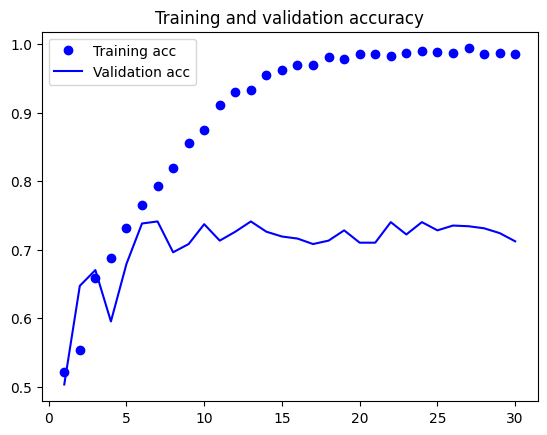

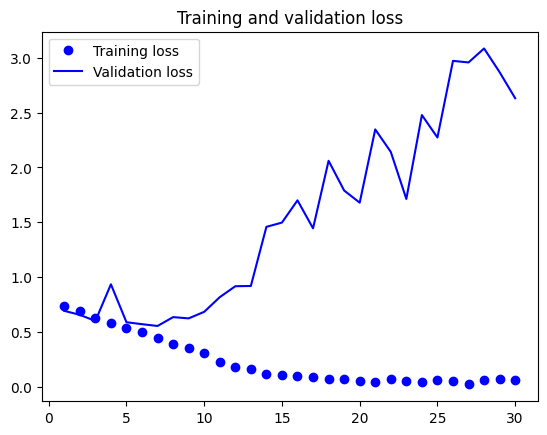

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# The training accuracy increases linearly over time, until it reaches nearly 100%, whereas the validation accuracy stalls at 70–72%.
# The validation loss reaches its minimum after only five epochs and then stalls, whereas the training loss keeps decreasing linearly until it reaches nearly 0.